In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [34]:
dataset = pd.read_csv("https://raw.githubusercontent.com/lemuelkbj/Heart_failure_prediction/main/heart_failure_clinical_records_dataset.csv")

In [35]:
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Coverting age to integer format 

In [36]:
dataset['age'] = dataset['age'].astype(int)

In [37]:
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [38]:
dataset = dataset.drop(dataset.columns[[6,11]],axis = 1)

EDA

In [39]:
dataset.shape

(299, 11)

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   serum_creatinine          299 non-null    float64
 7   serum_sodium              299 non-null    int64  
 8   sex                       299 non-null    int64  
 9   smoking                   299 non-null    int64  
 10  DEATH_EVENT               299 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 25.8 KB


In [41]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,9.40000,148.000000,1.000000,1.00000,1.00000


1. Feature Selection

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature Selection

In [213]:
X = dataset[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','serum_creatinine','serum_sodium','smoking']]
Y = dataset['DEATH_EVENT']

In [44]:
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [50]:
featurescore = pd.concat([dfcolumns,dfscores],axis = 1)
featurescore.columns = ['Feature','Score']

In [51]:
#top 3 data features
print(featurescore.nlargest(10,'Score')) 

                    Feature        Score
2  creatinine_phosphokinase  1897.314839
4         ejection_fraction    79.072541
0                       age    44.572096
6          serum_creatinine    19.814118
7              serum_sodium     1.618175
5       high_blood_pressure     1.221539
1                   anaemia     0.746593
8                   smoking     0.032347
3                  diabetes     0.000657


2. Feature Importance

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

[0.15898087 0.03376647 0.13357582 0.04760089 0.20439229 0.03438303
 0.19202699 0.14996161 0.04531204]


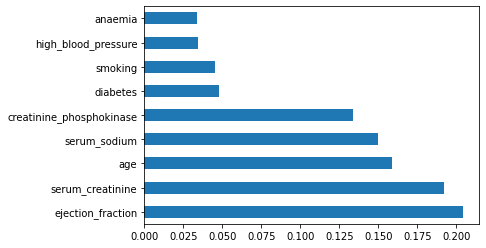

In [53]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [189]:
sel_X = dataset[['age','creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium']]


# ML ALGORITHMS

# KNN Algorithm

In [54]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [161]:
#test_train_split
X_train, X_test, y_train, y_test = train_test_split(sel_X, Y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto', metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [162]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0])

In [163]:
X_test.shape

(75, 5)

In [164]:
y_test.shape

(75,)

In [165]:
new_comparison_df = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})
new_comparison_df

,predictions,actual
173,1,0
287,0,0
51,0,1
146,1,0
214,0,0
...,...,...
91,0,0
291,0,0
42,0,1
187,0,1


In [166]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test, y_pred)

array([[50,  5],
       [14,  6]])

In [ ]:
from sklearn.metrics import accuracy_score as asc
acc_1 = asc(y_test, y_pred)
acc_1